# CSL558: Machine Learning 


**Module 2: Data Preparation and Feature Engineering in ML**



# Tutorial 2.5:  Image Processing 

Part 2.3: Feature Engineering
- Data Pre-processing and
- Data Visualization
- Dimension Reduction : PCA, SVD
- Feature Extraction :
- Feature Selection

# Image PRocessing using CV2 and PIL 

In [28]:
## necessary libraries
import matplotlib.pyplot as plt 
import matplotlib.image as img
from PIL import Image
import cv2

### load and read image

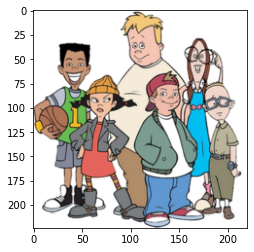

In [29]:
# image= img.imread('S_1.png')
image= img.imread('recess.png')

plt.imshow(image) 

### 1. convert color image into grayscale

In [30]:
# img= Image.open('S_1.png').convert('LA')

img = Image.open('recess.png').convert('L')
img.save('greyscale.png')

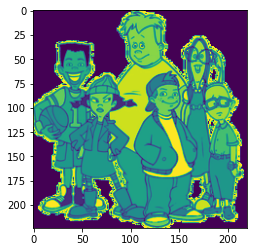

In [31]:
plt.imshow(img)

### 2. Resize image

In [32]:
print('size of the image (width, height):',img.size)

size of the image (width, height): (220, 224)


In [33]:
#### Note: anti-aliasing is a technique for minimizing the distortion artifacts known as aliasing when 
### representing a high-resolution image at a lower resolution.

In [34]:
# img = Image.open('S_1.png')

img = Image.open('recess.png')

img = img.resize((240, 200), Image.ANTIALIAS)
img.size

(240, 200)

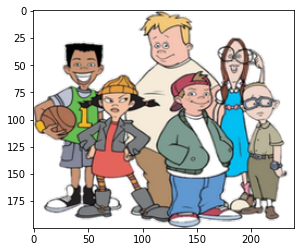

In [35]:
plt.imshow(img)

In [36]:
# ! pip install opencv-python

### 3. Rotate image

In [37]:
# im = Image.open("S_1.png")

im = Image.open("recess.png")

img=im.rotate(90)

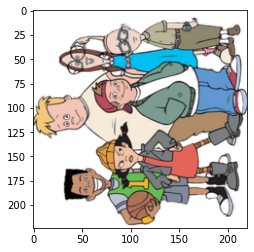

In [38]:
plt.imshow(img)

### Scaling

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa608bf8e80>,
 Text(0.5, 1.0, 'Scaled image'))

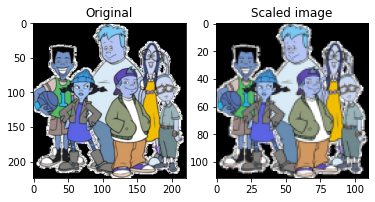

In [39]:
 
# img = cv2.imread('keras_sample.jpg') 
img = cv2.imread('recess.png') 

# Get number of pixel horizontally and vertically. 
(height, width) = img.shape[:2] 

# Specify the size of image along with interploation methods. 
# cv2.INTER_AREA is used for shrinking, whereas cv2.INTER_CUBIC 
# is used for zooming. 
res = cv2.resize(img,(int(width / 2), int(height / 2)), interpolation = cv2.INTER_AREA) 

# Write image back to disk. 
plt.subplot(121), plt.imshow(img),plt.title('Original')
plt.subplot(122), plt.imshow(res),plt.title('Scaled image')

In [40]:
img.shape

(224, 220, 3)

### Edge Detection

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa6092e65e0>,
 Text(0.5, 1.0, 'Edged image'))

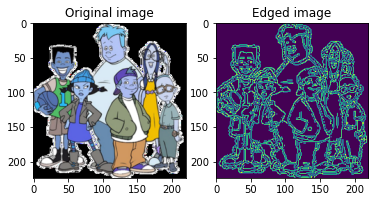

In [41]:
# Read image from disk. 
# img = cv2.imread('S_1.png') 

img = cv2.imread('recess.png') 

# Canny edge detection. 
edges = cv2.Canny(img, 100, 200) 

# Write image back to disk. 
plt.subplot(121), plt.imshow(img),plt.title('Original image')
plt.subplot(122), plt.imshow(edges),plt.title('Edged image')

### 4. Applying Noise

In [42]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

Color vision can be processed using RGB color space or HSV color space. RGB color space
describes colors in terms of the amount of red, green, and blue present. HSV color space
describes colors in terms of the Hue, Saturation, and Value. In situations where color description
plays an integral role, the HSV color model is often preferred over the RGB model. The HSV
model describes colors similarly to how the human eye tends to perceive color. RGB defines
color in terms of a combination of primary colors, where as, HSV describes color using more
familiar comparisons such as color, vibrancy and brightness. 




<img src="cv_blur.png">

In [43]:
#The purpose of using plt.figure() is to create a figure object.

#The whole figure is regarded as the figure object. 
#It is necessary to explicitly use plt.figure() when we want to #tweak the size of the figure and when we want to add multiple Axes objects in a single figure.

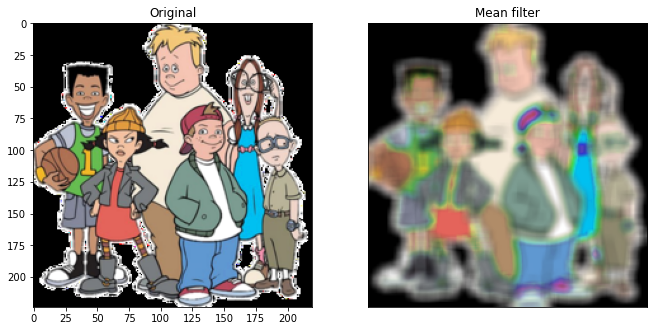

In [44]:
# image = cv2.imread('S_1.png') 

image = cv2.imread('recess.png') # reads the image

image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

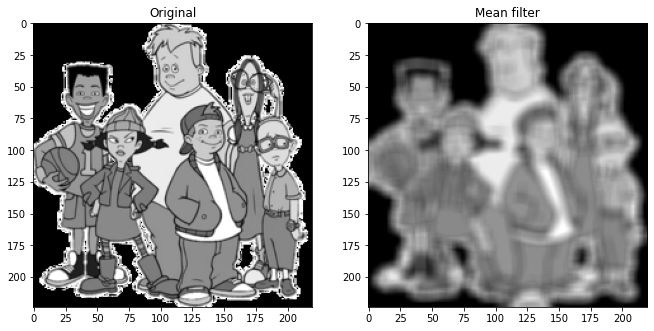

In [45]:
# The image will first be converted to grayscale
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.show()

In [46]:
# reference: https://towardsdatascience.com/image-filters-in-python-26ee938e57d2

### 5. Segmentation

 Image Segmentation. Image segmentation is the process of partitioning an image into multiple segments. Image segmentation is typically used to locate objects and boundaries in images.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa608c2a910>,
 Text(0.5, 1.0, 'segmented image'))

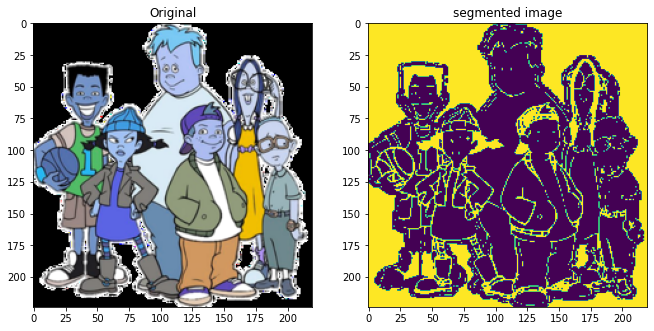

In [47]:
image = cv2.imread('recess.png') # reads the image
# image = cv2.imread('S_1.png') 

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.figure(figsize=(11,6))

# Displaying segmented images
plt.subplot(121), plt.imshow(image),plt.title('Original')
plt.subplot(122), plt.imshow(thresh),plt.title('segmented image')

In [48]:
# Reference: https://www.geeksforgeeks.org/python-thresholding-techniques-using-opencv-set-1-simple-thresholding/

### 6. Morphology

(<matplotlib.axes._subplots.AxesSubplot at 0x7fa6088c52e0>,
 Text(0.5, 1.0, 'segmented image'))

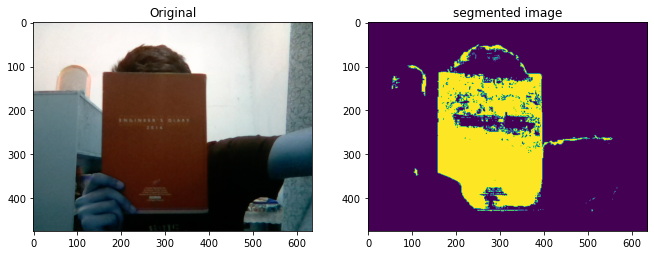

In [49]:
import numpy as np
image = cv2.imread('segment_sample.png') # reads the image
# image = cv2.imread('recess.png') # reads the image

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

# defining the range of masking 
blue1 = np.array([110, 50, 50]) 
blue2 = np.array([130, 255, 255]) 

# initializing the mask to be 
# convoluted over input image 
mask = cv2.inRange(hsv, blue1, blue2) 

# passing the bitwise_and over 
# each pixel convoluted 
res = cv2.bitwise_and(image, image, mask = mask) 

# defining the kernel i.e. Structuring element 
kernel = np.ones((5, 5), np.uint8) 

# defining the opening function  
# over the image and structuring element 
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel) 
plt.figure(figsize=(11,6))

plt.subplot(121), plt.imshow(image),plt.title('Original')
plt.subplot(122), plt.imshow(mask),plt.title('segmented image')